In [1]:
# independencies 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from config import config

In [2]:
# connect to PostgreSQL database

def query_func(sql_query):
    """ Connect to the PostgreSQL database server """
    conn = None
    
    # read connection parameters
    params = config()

    # connect to the PostgreSQL server
    conn = psycopg2.connect(**params)

    # create a cursor
    cur = conn.cursor()
        
    # execute a statement
    cur.execute(sql_query)


    # display the PostgreSQL database server version
    query_data = cur.fetchall()
       
    # close the communication with the PostgreSQL
    cur.close()
    return query_data    

In [3]:
# make query to retrive salary infomation for salary dataframe

salary_query = "SELECT a.emp_no AS emp_number, a.first_name, a.last_name, b.title, c.salary \
FROM employees AS a, titles AS b, salaries AS c \
WHERE b.title_id = a.emp_title_id AND a.emp_no = c. emp_no"

salary_data = query_func(salary_query)

salary_df = pd.DataFrame(salary_data, columns = ['emp_number', 'first_name', 'last_name', 'title', 'salary'])

salary_df.head()

,emp_number,first_name,last_name,title,salary
0,246449,Subbu,Bultermann,Staff,87084
1,67799,Pantung,Cools,Engineer,48111
2,299898,Munehiko,Janocha,Staff,63315
3,492723,Piyawadee,Sanella,Senior Engineer,46740
4,411614,Martins,Wynblatt,Senior Engineer,54770


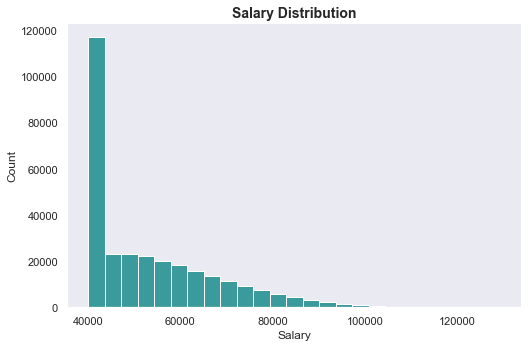

In [11]:
# visualize salary distributions

sns.set_theme(style = 'whigrid', rc = {'figure.figsize':(7,7)})

sns.displot(kind = 'hist', data = salary_df, x = 'salary', height = 5, aspect = 1.5, 
            bins = 25, color = "teal", edgecolor = 'w')

plt.xlabel("Salary") 
plt.xlabel("Salary") 
plt.title("Salary Distribution", fontsize = 14, fontweight = "bold")

plt.tight_layout(h_pad = 1)
plt.grid(which = "major", ls ="-")

plt.savefig("../images/Salary_Distribution")


In [5]:
# salary data groupby titles

avg_t_salary = round(salary_df.groupby(['title'], as_index = False)['salary'].mean(),2)
avg_t_salary_df = pd.DataFrame(avg_t_salary) 

avg_t_salary_df = avg_t_salary_df.rename(columns = {'salary':'avg_salary'}) 

avg_t_salary_df

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


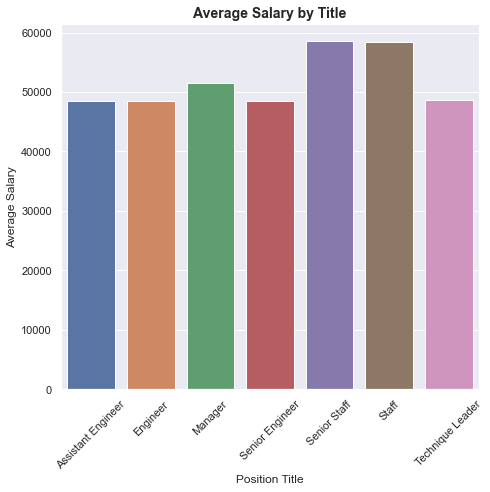

In [6]:
# visualize the average salary by title

sns.set_theme(style = 'darkgrid', rc = {'figure.figsize':(7,7)})

ax = sns.barplot(data = avg_t_salary_df, x = 'title', y = 'avg_salary')

plt.xlabel('Position Title')
plt.ylabel('Average Salary')
            
plt.title('Average Salary by Title', fontsize = 14, fontweight = 'bold')

plt.xticks(rotation = 45)

plt.tight_layout(h_pad = 10)

plt.savefig("../images/Salary_title")

In [7]:
# make query to retrive emp_no = 499942

emp_query = "SELECT a.emp_no AS emp_number, a.first_name, a.last_name, b.salary \
FROM employees AS a \
LEFT JOIN salaries AS b \
ON (a.emp_no = b.emp_no) \
WHERE a.emp_no = '499942'"

emp_data = query_func(emp_query)
emp_df = pd.DataFrame(emp_data, columns = ['Employee_number', 'Fisrt_name', 'Last_name', 'Salary'])


emp_df.head()


,Employee_number,Fisrt_name,Last_name,Salary
0,499942,April,Foolsday,40000
